In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d5 = pd.read_csv('trainDataset5.csv')

In [4]:
TargetVar = ['Pair Mass']
Predictors = ['Muon 1 Energy', 'Muon 2 Energy', 'Muon 1 pT', 'Muon 2 pT', 'Muon 1 Eta', 'Muon 2 Eta', 'Muon 1 Phi', 'Muon 2 Phi','Muon 1 Rapidity', 'Muon 2 Rapidity']

In [5]:
X = d5[Predictors].values
Y = d5[TargetVar].values

In [6]:
#Standarize data
from sklearn.preprocessing import StandardScaler
PredScaler = StandardScaler()
TargetVarScaler =StandardScaler()

In [7]:
#store fitting object
PredScalerFit = PredScaler.fit(X)
TargVarScalerFit = TargetVarScaler.fit(Y)

In [8]:
#generate standarized values
X = PredScalerFit.transform(X)
Y = TargVarScalerFit.transform(Y)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [33]:
clf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=0)
clf.fit(x_train, y_train)

/Users/lml3638/miniconda3/envs/scikit-learn/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=4, random_state=0)

In [68]:
lin = LinearRegression().fit(x_train, y_train)

In [46]:
dtc = DecisionTreeRegressor().fit(x_train, y_train)


In [69]:
pred_randForest = clf.predict(x_test)
#pred_gaussProcess = gpc.predict(x_test)
pred_decisionTree = dtc.predict(x_test)
pred_linear = lin.predict(x_test)

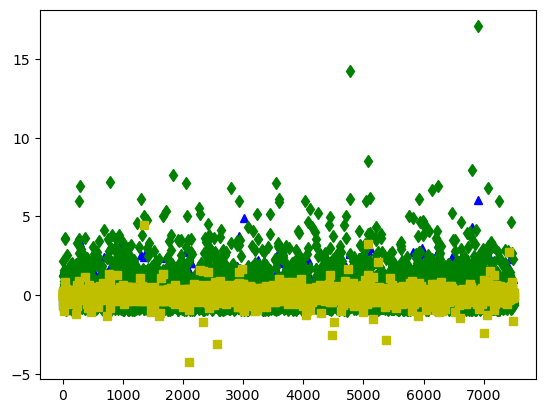

In [70]:
plt.plot(pred_randForest, "b^", label="RandomForestRegressor")
#plt.plot(pred_gaussProcess, "gd", label="GaussianProcessClassifier")
plt.plot(pred_decisionTree, "gd", label="DecisionTreeRegressor")
plt.plot(pred_linear, "ys", label="LinearRegression")
#plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

In [71]:
pred_randForest=pred_randForest.reshape(-1, 1)
pred_decisionTree = pred_decisionTree.reshape(-1, 1)
pred_linear = pred_linear.reshape(-1, 1)

In [72]:
#scaling predicted back to original scale
Predictions_RF = TargVarScalerFit.inverse_transform(pred_randForest)
Predictions_DT = TargVarScalerFit.inverse_transform(pred_decisionTree)
Predictions_LN = TargVarScalerFit.inverse_transform(pred_linear)

In [61]:
y_test_OG = TargVarScalerFit.inverse_transform(y_test)

In [62]:
test_data = PredScalerFit.inverse_transform(x_test)

In [73]:
TestData = pd.DataFrame(data=test_data, columns=Predictors)
TestData['Pair Mass'] =  y_test_OG
TestData['Pair Mass Predict Random Forest'] = Predictions_RF
TestData['Pair Mass Predict Decision Tree'] = Predictions_DT
TestData['Pair Mass Predict Linear Regression'] = Predictions_LN
TestData.head()

,Muon 1 Energy,Muon 2 Energy,Muon 1 pT,Muon 2 pT,Muon 1 Eta,Muon 2 Eta,Muon 1 Phi,Muon 2 Phi,Muon 1 Rapidity,Muon 2 Rapidity,Pair Mass,Pair Mass Predict Random Forest,Pair Mass Predict Decision Tree,Pair Mass Predict Linear Regression
0,6.41671,8.84899,5.54746,5.51441,-0.552476,-1.050630,-3.048630,-1.54290,-0.552385,-1.050490,8.02765,8.144103,9.49098,9.988132
1,43.15050,6.98135,7.41396,2.66594,2.447010,1.617080,1.825930,2.21710,2.446910,1.616360,3.92058,12.533179,5.85016,10.831028
2,15.35520,10.53380,13.08420,8.87277,0.580926,0.602624,-1.545860,-1.39655,0.580909,0.602586,1.63243,8.915425,7.79258,8.924635
3,15.86780,5.49148,8.25399,3.76166,-1.270950,-0.925363,0.670530,1.63615,-1.270880,-0.925075,5.44490,9.001760,3.83558,10.747419
4,14.80350,15.82780,13.03080,2.74657,0.515823,2.436920,0.945547,-2.33067,0.515807,2.436200,18.17520,18.756299,14.19240,14.273493


In [41]:
from sklearn.metrics import mean_absolute_percentage_error

In [42]:
100-mean_absolute_percentage_error(TestData['Pair Mass'], TestData['Pair Mass Predict Random Forest'])

99.17367939929322

In [65]:
100-mean_absolute_percentage_error(TestData['Pair Mass'], TestData['Pair Mass Predict Decision Tree'])

99.37768603212857

In [74]:
100-mean_absolute_percentage_error(TestData['Pair Mass'], TestData['Pair Mass Predict Linear Regression'])

98.985650299205